Null values:
 interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64


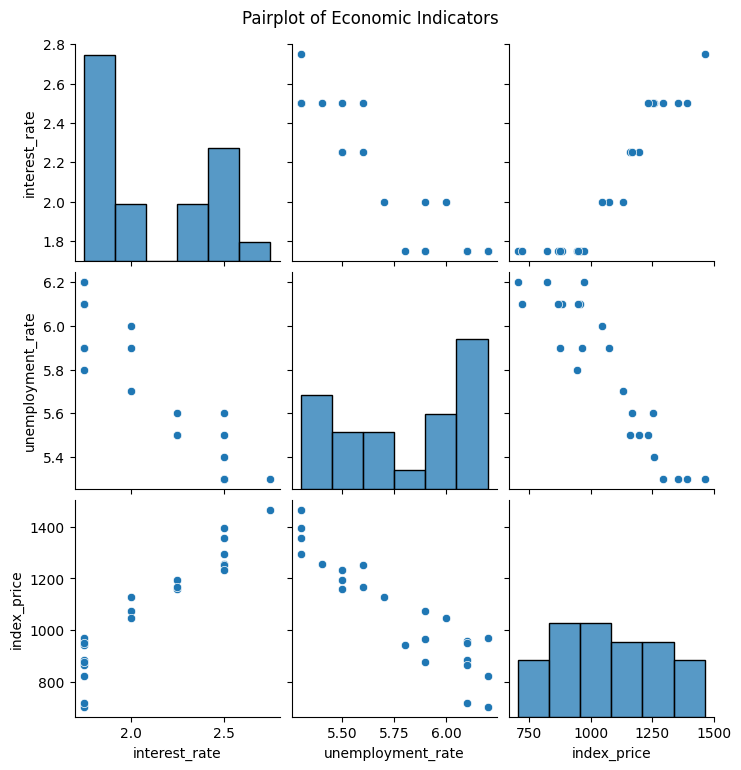


Correlation Matrix:
                    interest_rate  unemployment_rate  index_price
interest_rate           1.000000          -0.925814     0.935793
unemployment_rate      -0.925814           1.000000    -0.922338
index_price             0.935793          -0.922338     1.000000


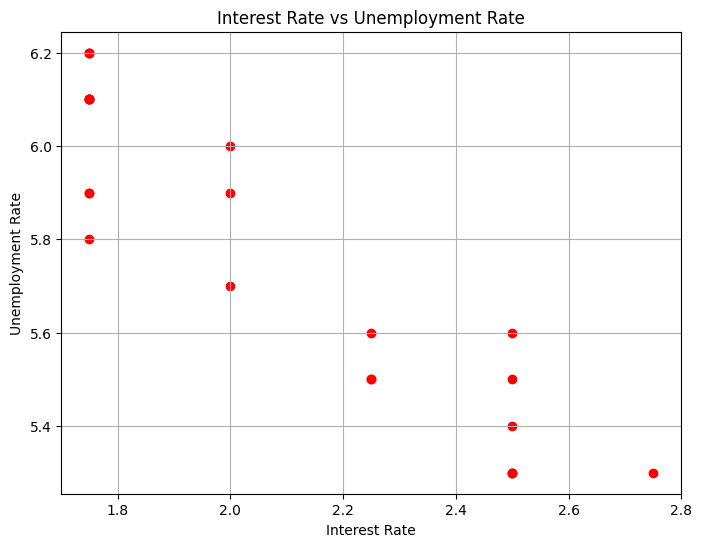


Cross-Validated Negative MSE Scores: [-1861.74046551 -8715.8459466  -7707.52362191 -9169.13776461
  -791.32842311]
Average CV MSE: 5649.115244350769

Evaluation Metrics:
Mean Squared Error (MSE): 5793.762887712549
Mean Absolute Error (MAE): 59.93578152323547
R² Score: 0.8278978091457151
Adjusted R² Score: 0.7131630152428585


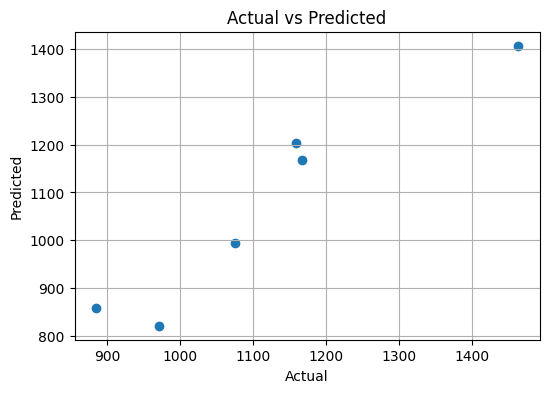

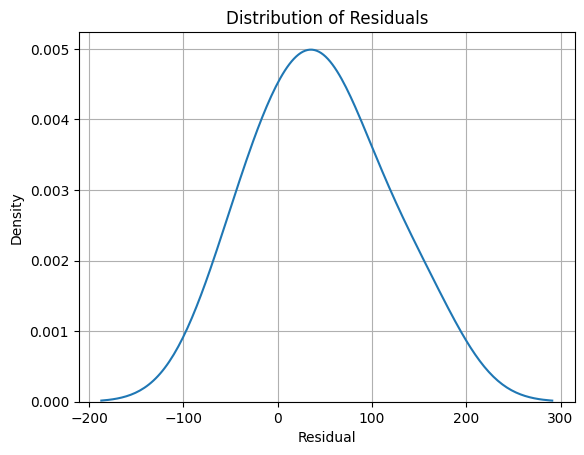

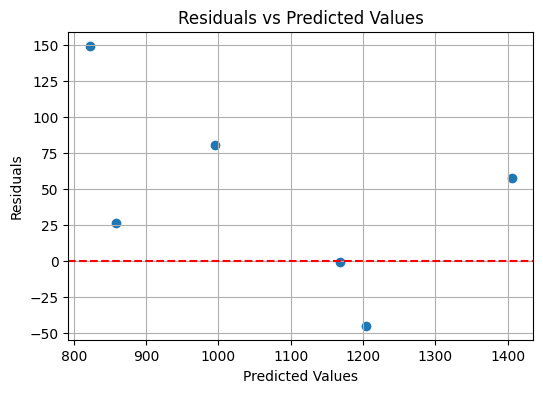


OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     69.88
Date:                Fri, 23 May 2025   Prob (F-statistic):           2.50e-08
Time:                        14:58:03   Log-Likelihood:                -100.85
No. Observations:                  18   AIC:                             207.7
Df Residuals:                      15   BIC:                             210.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const        

c:\Users\sahus\OneDrive\Desktop\Complete Data Science\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [23]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

# 📌 2. Load and Clean Dataset
df_index = pd.read_csv('economic_index.csv')
df_index.drop(columns=["Unnamed: 0", "year", "month"], inplace=True)
df_index.columns = df_index.columns.str.strip()  # Remove any extra whitespace

# 📌 3. Check for Null Values
print("Null values:\n", df_index.isnull().sum())

# 📊 4. Visualize Relationships
sns.pairplot(df_index)
plt.suptitle("Pairplot of Economic Indicators", y=1.02)
plt.show()

print("\nCorrelation Matrix:\n", df_index.corr())

# 📈 5. Scatter Plot for Specific Relationship
plt.figure(figsize=(8, 6))
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='red')
plt.title('Interest Rate vs Unemployment Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

# 🔄 6. Split Features & Target
X = df_index[["interest_rate", "unemployment_rate"]]
y = df_index["index_price"]

# ✂️ 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 🤖 8. Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔁 9. Cross Validation
cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("\nCross-Validated Negative MSE Scores:", cv_scores)
print("Average CV MSE:", -np.mean(cv_scores))

# 📊 10. Evaluate Predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")
print(f"Adjusted R² Score: {adjusted_r2}")

# 📈 11. Linearity Check
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

# 🔸 Calculate Residuals
residuals = y_test - y_pred

# 🔸 Check Normal Distribution
sns.kdeplot(residuals)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.grid(True)
plt.show()

# 🔸 Check Residual Patterns
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

# 📊 12. OLS Summary (Using statsmodels)
X_train_sm = sm.add_constant(X_train)  # Add constant for intercept
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("\nOLS Regression Summary:")
print(ols_model.summary())

# ✔️ Confirm that the coefficients match
print("\nScikit-learn Coefficients:", model.coef_)
print("Statsmodels Coefficients:", ols_model.params.values[1:])  # exclude intercept





In [ ]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 📂 Step 2: Load the Dataset
df = pd.read_csv("economic_index.csv")

# 🧹 Step 3: Clean Column Names
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Remove unnamed index column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 🔍 Step 4: Inspect Cleaned Data
print("Cleaned Columns:", df.columns.tolist())
print(df.head())
print("Correlation Matrix:\n", df.corr())
#                    unemployment_rate  index_price  
#                             0.935300    -0.988246  
# year                       -0.877000     0.863232  
# month                      -0.351189     0.481287  
# interest_rate              -0.925814     0.935793  
# unemployment_rate           1.000000    -0.922338  
# index_price                -0.922338     1.000000  

# 🎯 Step 5: Define Features and Target
X = df[['interest_rate', 'unemployment_rate']]  # Independent variables
y = df['index_price']                           # Dependent variable

# ✂️ Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧮 Step 7: Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 📊 Step 8: Model Coefficients
print("\nIntercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef}")
# Intercept: 2601.599844115357
# Coefficients:
#   interest_rate: 260.26126266562704
#   unemployment_rate: -360.5533904910369

# 🔍 Step 9: Model Performance on Test Set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Model Performance:
# Mean Squared Error (MSE): 6957.105303258817
# R² Score: 0.8254940547158579


Cleaned Columns: ['', 'year', 'month', 'interest_rate', 'unemployment_rate', 'index_price']
      year  month  interest_rate  unemployment_rate  index_price
0  0  2017     12           2.75                5.3         1464
1  1  2017     11           2.50                5.3         1394
2  2  2017     10           2.50                5.3         1357
3  3  2017      9           2.50                5.3         1293
4  4  2017      8           2.50                5.4         1256
Correlation Matrix:
                                      year         month  interest_rate  \
                   1.000000 -8.667781e-01 -4.986939e-01      -0.934555   
year              -0.866778  1.000000e+00  7.884865e-14       0.882851   
month             -0.498694  7.884865e-14  1.000000e+00       0.339526   
interest_rate     -0.934555  8.828507e-01  3.395257e-01       1.000000   
unemployment_rate  0.935300 -8.769997e-01 -3.511891e-01      -0.925814   
index_price       -0.988246  8.632321e-01  4.812873e-